In [11]:
#! /usr/bin/env python
import rospy
import actionlib
import actionlib.msg
import assignment_2_2022.msg
import matplotlib.pyplot as plt
import tf
from std_srvs.srv import *
import sys
import select
import numpy as np
from sensor_msgs.msg import LaserScan
from nav_msgs.msg import Odometry
from matplotlib.animation import FuncAnimation
from tf.transformations import quaternion_matrix
from geometry_msgs.msg import Point, Pose, Twist
from assignment_2_2022.msg import Posxy_velxy
from colorama import Fore, Style
from colorama import init
import assignment_2_2022.msg
import jupyros as jr
import time
import math
import ipywidgets as widgets
from IPython.display import display
from tf.transformations import quaternion_matrix 
from actionlib_msgs.msg import GoalStatusArray
from assignment_2_2022.srv import goal_rc
%matplotlib notebook

In [12]:
from ipywidgets import Button, Layout, ButtonStyle, GridBox, VBox, HBox 
import ipywidgets as widgets

import jupyros as jr
import rospy
from std_msgs.msg import String

rospy.init_node('action')

def action_client():
    """
    This function creates the action client and waitingfor the server to be started 
       
    """

    # create the action client
    action_client = actionlib.SimpleActionClient('/reaching_goal', assignment_2_2022.msg.PlanningAction)
    # wait for the server to be started
    action_client.wait_for_server()
    
    status_goal = False
	 
    goal = assignment_2_2022.msg.PlanningGoal()
    goal.target_pose.pose.position.x = x.value # the converted x position is become a goal x position to send to the server 
    goal.target_pose.pose.position.y = y.value # the converted y position is become a goal x position to send to the server 
					
            # Send the goal to the action server
    action_client.send_goal(goal) # sending the goal to the action 
    status_goal = True


In [13]:
print('Please set x and y positions')

counter = 1;

x = widgets.FloatSlider(
    min=-10,
    max=10,
    step=0.1,
    description='x')

y = widgets.FloatSlider(

    min=-10,
    max=10,
    step=0.1,
    description='y')


def f(x, y):
    print('Target x position is: {}'.format(x))
   
    print('Target y position is: {}'.format(y))

    
button = widgets.Button(description="Set the target position")
output_2 = widgets.Output()
display(button,output_2)

#---------------------------------------------------------
button_3 = widgets.Button(description = "Cancel goal")
output_5 = widgets.Output()
display(button_3, output_5)
#---------------------------------------------------------
  
def on_button_3_clicked(b): 
    with output_5:
        global not_reached
        
        action_client()
         
        print("Target position is cancelled")
        x = 0
        y = 0
        print(not_reached)
        
button_3.on_click(on_button_3_clicked)

#---------------------------------------------------------
    
    
def on_button_clicked(b):
    global counter
    with output_2:
        
        action_client()
          
        print("{}.Target position set as x: {}, y:{}".format(counter, x.value, y.value))
        
        
        counter += counter 
        
not_reached = 0        

button.on_click(on_button_clicked)
  
out = widgets.interactive_output(f,{'x': x, 'y': y})
  
widgets.HBox([widgets.VBox([x, y]), out]) 

#---------------------------------------------------------



    

Please set x and y positions


Button(description='Set the target position', style=ButtonStyle())

Output()

Button(description='Cancel goal', style=ButtonStyle())

Output()

<IPython.core.display.Javascript object>


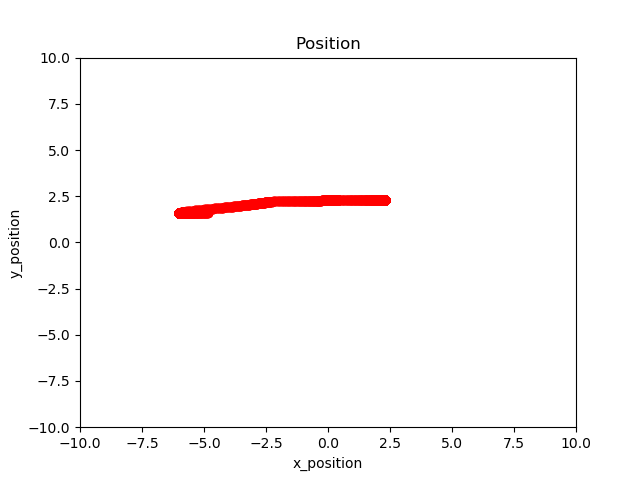

In [14]:
class Visualiser:
    
    def __init__(self):
        self.fig, self.ax = plt.subplots()
        self.ln, = plt.plot([], [], 'ro')
        self.x_data, self.y_data = [] , []

    def plot_init(self):
        self.ax.set_xlim(-10, 10)
        self.ax.set_ylim(-10, 10)
        self.ax.set_title('Position')
        self.ax.set_xlabel('x_position')
        self.ax.set_ylabel('y_position')
        return self.ln

    def odom_callback(self, msg):
        self.y_data.append(msg.pose.pose.position.y)
        self.x_data.append(msg.pose.pose.position.x)

        #goal.target_pose.pose.position.x = x.value

    def update_plot(self, frame):
        self.ln.set_data(self.x_data, self.y_data)
        return self.ln

#rospy.init_node('action_usr')

vis = Visualiser()
sub = rospy.Subscriber('/odom', Odometry, vis.odom_callback)

ani = FuncAnimation(vis.fig, vis.update_plot, init_func = vis.plot_init)
#plt.show(block=True)


In [15]:
counter_b = 1;
def odom_callback(msg):
    global min_front, min_right, min_left
    min_front = msg.ranges[200]
    min_right = msg.ranges[0]
    min_left = msg.ranges[500]
    
jr.subscribe('/scan', LaserScan, odom_callback)
    
button_2 = widgets.Button(description="Distance to nearest obstacle!")
output_3 = widgets.Output()
display(button_2, output_3)
  
def on_button_clicked(b):
    
    
    global counter_b
    
    front_dist = min_front
    right_dist = min_right
    left_dist = min_left
    
    with output_3:
        
        #action_client()
        if front_dist<right_dist and front_dist<left_dist:
            print("{}.Obstacle detected on the front, distance is: {}".format(counter_b, front_dist))  
        elif right_dist<front_dist and right_dist<left_dist:
            print("{}.Obstacle detected on the right, distance is: {}".format(counter_b, right_dist))          
        elif left_dist<front_dist and left_dist<right_dist:
            print("{}.Obstacle detected on the left, distance is: {}".format(counter_b, left_dist))
                  
            
        counter_b += counter_b 
              
        
button_2.on_click(on_button_clicked)


#vis_2 = Visualiser_2()
#sub_2 = rospy.Subscriber('/scan', LaserScan, vis_2.scan_callback)

#ani = FuncAnimation(vis_2.fig, vis_2.update_plot, init_func=vis_2.plot_init)
#plt.subplots_adjust(hspace=0.4)
#plt.show(block=True)
                  
        
    
    
        
    

Removing previous callback, only one redirection possible right now


Button(description='Distance to nearest obstacle!', style=ButtonStyle())

Output()

In [16]:
client = actionlib.SimpleActionClient('/reaching_goal', assignment_2_2022.msg.PlanningAction)

#wait for server
client.wait_for_server()

True

In [17]:
jr.subscribe("/reaching_goal/result", assignment_2_2022.msg.PlanningActionResult, checkGoalResult)

In [18]:
def checkGoalResult(msg):
    global reached,not_reached
    
    # Get the status 
    status = msg.status.status

    # If status is 2 the goal is canceled
    if status == 2:
        
        not_reached = not_reached + 1

    # If status is 3 the goal is reached
    elif status == 3:
        
        reached = reached + 1
        print(reached)
        
reached = 0

In [19]:
def plot(button):
    global reached
    %matplotlib notebook
    n=[reached, not_reached,(reached + not_reached)]
    q=["Goal Reach","Goal Not Reach","Total Goal"]
    fig = plt.bar(q,n)

Button(description='Plot', style=ButtonStyle())

Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/usr/lib/python3/dist-packages/matplotlib/animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


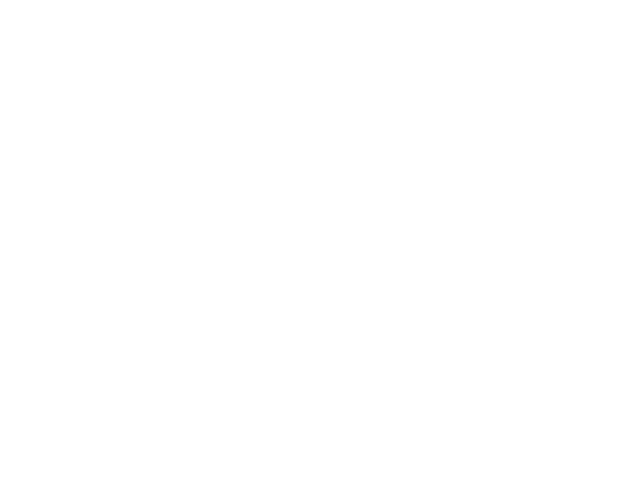

<IPython.core.display.Javascript object>


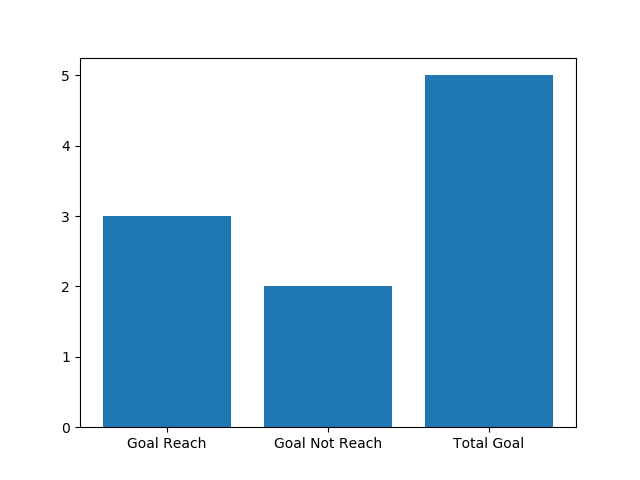

In [20]:
button34 = widgets.Button(description="Plot")
# Display the button
display(button34)
button34.on_click(plot)